In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

Import the dataset

In [366]:
path='/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project /P07: SRK Capston project/LoanData.csv'

In [367]:
df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Loan_ID : Unique loan id
- Gender : Male/Female
- Married : Applicant Married Status (Y/N)
- Dependents : Number of dependendants
- Education : Education of Applicant
- Self Employed : Y/N
- ApplicatIncome : Income of apllicant
- CoapplicantIncome : Coapplicant Income
- Loan Ammount : loan amount in thounsant of dollar
- Loan_Amount_Term : terms of loan in months
- Creadit_History : creadit history meets guidlines yes or no
- Property_Area : Urban / Sami-Urban / Rural
- Loan_Status : Loan Approved (Y/N) Targrt Variable


In [368]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

dataset understanding

In [369]:
df['Loan_ID'].nunique()

614

Stady Descreat variable data

In [370]:
#drop becaused of all unique values
df.drop(columns=['Loan_ID'], inplace= True)

In [371]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

need to encode this male and female

In [372]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

need to encode this yes and no

In [373]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

3+ ---> is wrong enter data

In [374]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

need to encode this yes and no

In [375]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

need to encode this yes and no

In [376]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [377]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [378]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [379]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [380]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [381]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [382]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [383]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']#float or int
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status']#object
doscret_count = ['Dependents','Loan_Amount_Term']#int

Exploratory data analysis (EDA)
____


In [384]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

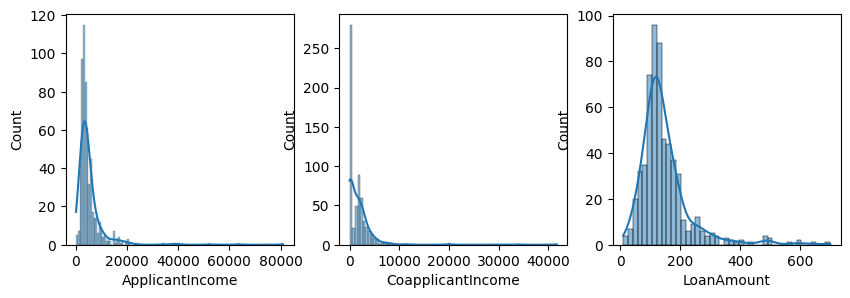

In [385]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.histplot(df['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df['LoanAmount'],kde=True)

In [386]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

<Figure size 100x100 with 0 Axes>

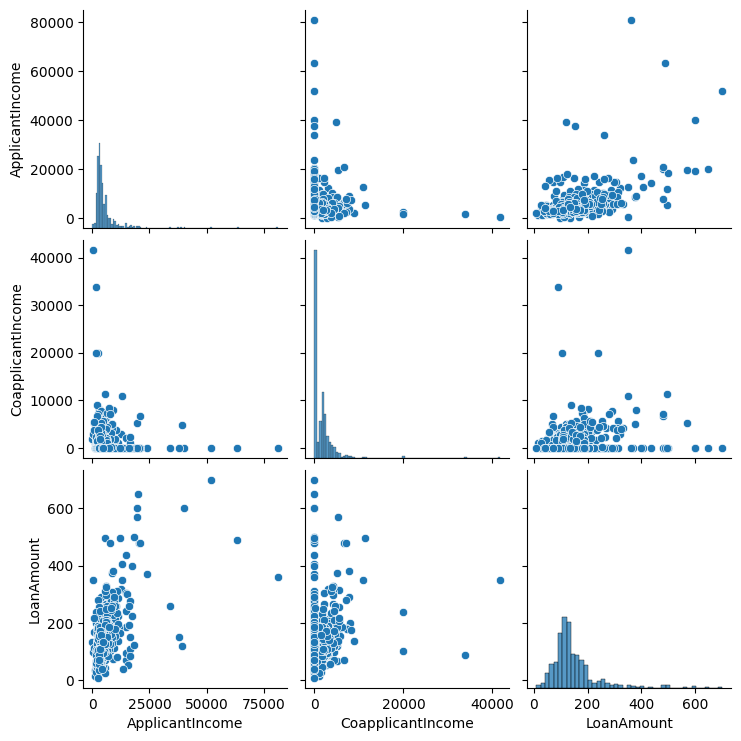

In [387]:
plt.figure(figsize=(1,1))
sns.pairplot(df[continous])

In [388]:
df[continous].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


<Axes: >

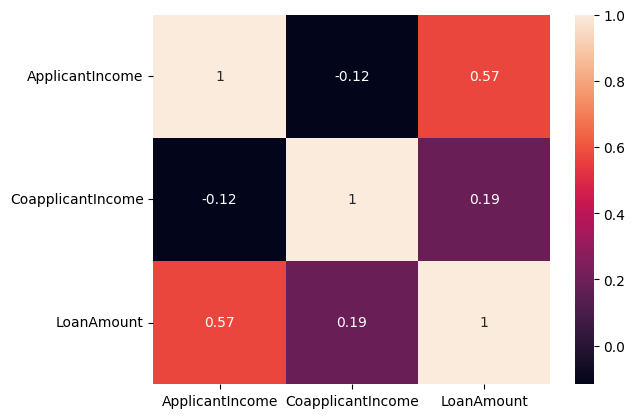

In [389]:
sns.heatmap(df[continous].corr(),annot=True)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [391]:
'''plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,1)
sns.countplot(df['Married'])

plt.subplot(2,3,1)
sns.countplot(df['Gender'])'''

"plt.figure(figsize=(18,8))\nplt.subplot(2,3,1)\nsns.countplot(df['Gender'])\n\nplt.subplot(2,3,1)\nsns.countplot(df['Married'])\n\nplt.subplot(2,3,1)\nsns.countplot(df['Gender'])"

In [392]:
df.isnull().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [393]:
df = df.dropna(subset =['LoanAmount','Loan_Amount_Term'])

In [394]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(0)

In [395]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

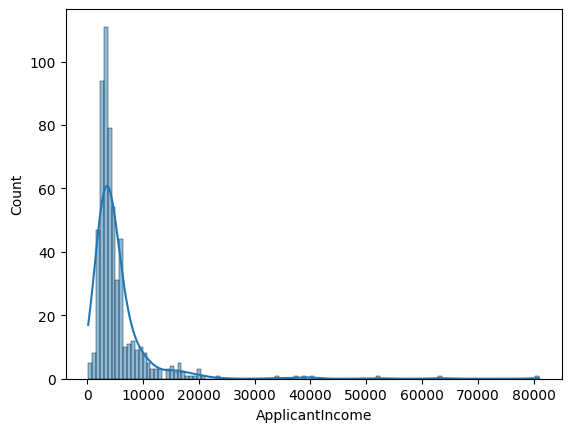

In [396]:
sns.histplot(df['ApplicantIncome'], kde=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

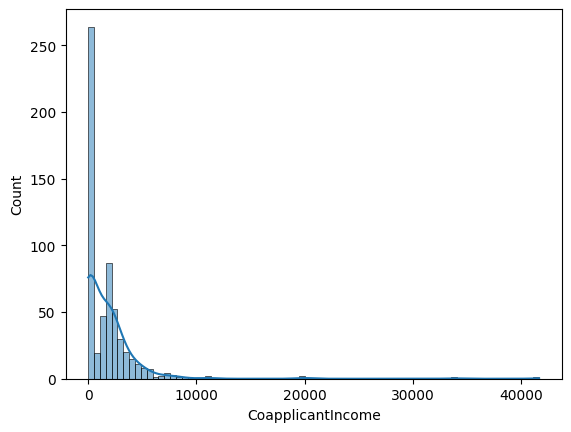

In [397]:
sns.histplot(df['CoapplicantIncome'], kde=True)

Data Preparation
____


In [398]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace=True)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0


Modify wrong data

In [399]:
df['Dependents'].replace({'3+':3},inplace=True)

In [400]:
df['Credit_History'] = df['Credit_History'].astype(object)
df['Dependents'] = df['Dependents'].astype(object)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(object)

In [401]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

In [402]:
df.describe()#df[Continous].describe()

,LoanAmount,Income
count,578.000000,578.000000
mean,147.143599,7075.620969
std,86.342523,6597.497142
min,9.000000,1442.000000
25%,100.000000,4166.000000
50%,128.000000,5407.000000
75%,168.000000,7539.500000
max,700.000000,81000.000000


from the data understand
ApplicantIncome - Right skew

<Axes: xlabel='LoanAmount', ylabel='Count'>

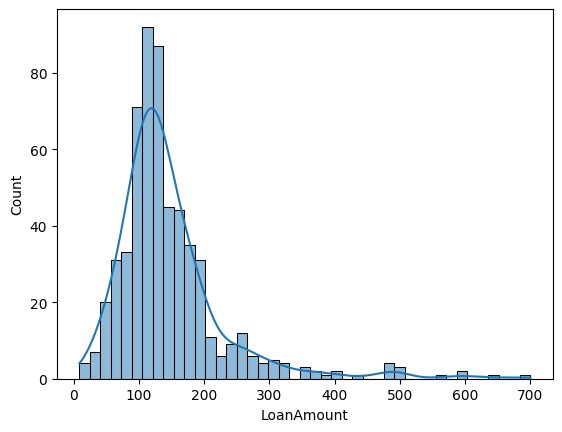

In [403]:
sns.histplot(df['LoanAmount'], kde=True)

In [404]:
df.describe(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,578,578,578,578,578,578.0,578.0,578,578
unique,2,2,4,2,2,10.0,2.0,3,2
top,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
freq,472,377,335,457,501,493.0,450.0,225,403


Transformation

In [405]:
df[['Income','LoanAmount']].skew()

Income        5.579907
LoanAmount    2.649577
dtype: float64

In [406]:
from scipy.stats import boxcox
df['LoanAmount'] ,c = boxcox(df['LoanAmount'])
df['Income'] ,c = boxcox(df['Income'])

In [407]:
df[['Income','LoanAmount']].skew()

Income       -0.030260
LoanAmount    0.027139
dtype: float64

data preprocessing

In [408]:
df['Dependents'] = df['Dependents'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

In [409]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [411]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.iloc[:,[6,7]] = sc.fit_transform(X.iloc[:,[6,7]] )'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX.iloc[:,[6,7]] = sc.fit_transform(X.iloc[:,[6,7]] )'

In [415]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
ohe = OneHotEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [418]:
X=df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

Modeling and evaluation

In [419]:
Train=[]
Test=[]
rs=[]
CV=[]

for i in range(0,100 ):
  #train test slpit
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=i, test_size=0.2)

#Modeling
  from sklearn.linear_model import LogisticRegression
  m1 = LogisticRegression()
  m1.fit(X_train, y_train)

  #Prediction
  yp_train = m1.predict(X_train)
  yp_test = m1.predict(X_test)


  #Model Evoluation
  from sklearn.metrics import accuracy_score
  Train.append(accuracy_score(y_train,yp_train))
  Test.append(accuracy_score(y_test,yp_test))

  from sklearn.model_selection import cross_val_score
  cvs = cross_val_score(m1,X_test, yp_test,cv=5, scoring="accuracy").mean()
  cvs1 = cross_val_score(m1,X_train, yp_train,cv=5,scoring="accuracy").mean()
  CV.append(cross_val_score(m1,X_train, yp_train,cv=5,scoring="accuracy").mean())
  '''print("Cross validation score test : ", cvs)
  print("Cross validation score test : ", cvs1)'''

em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em['Test']*em['Test'])<=0.05) & (abs(em['Test']*em["CV"])<=0.05)]
rs = em[em['CV']==1].index.to_list()[0]
print("Best RTandom Value is : ",rs)



Best RTandom Value is :  6


train test with best random value

In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=rs, test_size=0.2)

Machine Learning Modeling & Evaluation

1. Logistic Regression
____

In [421]:
from sklearn.linear_model import LogisticRegression
m2 = LogisticRegression()
m2.fit(X_train, y_train)

ypred_train = m2.predict(X_train)
ypred_test = m2.predict(X_test)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m2,X_train,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ",accuracy_score(y_test, ypred_test))




Trian Accuracy :  0.7770562770562771
Cross Val Score :  0.7748480598410472
Test Accuracy :  0.7241379310344828


2. KNN

In [422]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
m4 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m4.fit(X_train, y_train)

m5 = m4.best_estimator_

ypred_train = m2.predict(X_train)
ypred_test = m2.predict(X_test)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m5,X_train,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ",accuracy_score(y_test, ypred_test))

Trian Accuracy :  0.7770562770562771
Cross Val Score :  0.7142823749415614
Test Accuracy :  0.7241379310344828


In [423]:
m4.best_estimator_

KNeighborsClassifier(n_neighbors=24)

3. SVM

In [424]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C': [0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
m6 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m6.fit(X_train, y_train)

m7 = m6.best_estimator_

ypred_train = m7.predict(X_train)
ypred_test = m7.predict(X_test)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m7,X_train,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ",accuracy_score(y_test, ypred_test))

Trian Accuracy :  0.7770562770562771
Cross Val Score :  0.7769985974754559
Test Accuracy :  0.7241379310344828


4. Decision tree

In [425]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
m8 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m8.fit(X_train, y_train)

m9 = m8.best_estimator_
dt_fi = m9.feature_importances_

index = [i for i,x in enumerate(dt_fi) if x>0]
X_train_new = X_train.iloc[:,index]
X_test_new = X_test.iloc[:,index]
m9.fit(X_train_new,y_train)

ypred_train = m9.predict(X_train_new)
ypred_test = m9.predict(X_test_new)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m9,X_train,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))

Trian Accuracy :  0.7770562770562771
Cross Val Score :  0.7769985974754559
Test Accuracy :  0.7241379310344828


5. Random Forest

In [426]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
m10 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m10.fit(X_train, y_train)

m11 = m10.best_estimator_
rf_fi = m11.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x>0]
X_train_new = X_train.iloc[:,index]
X_test_new = X_test.iloc[:,index]
m11.fit(X_train_new,y_train)

ypred_train = m11.predict(X_train_new)
ypred_test = m11.predict(X_test_new)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m11,X_train,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))

Trian Accuracy :  0.9978354978354979
Cross Val Score :  0.7314866760168303
Test Accuracy :  0.7068965517241379


6. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

estimator = AdaBoostClassifier()
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
m12 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m12.fit(X_train, y_train)

m13 = m12.best_estimator_
ab_fi = m13.feature_importances_

index = [i for i,x in enumerate(ab_fi) if x>0]
X_train_new = X_train.iloc[:,index]
X_test_new = X_test.iloc[:,index]
m13.fit(X_train_new,y_train)

ypred_train = m13.predict(X_train_new)
ypred_test = m13.predict(X_test_new)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m13,X_train_new,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))

7. Gradient Boost

In [ ]:
from xgboost import XGBClassifier

estimator = XGBClassifier()
param_grid = {'n_estimators':[10,20,30],'max_depth':[3,4,5],'gamma':[0.01,0.3,0.7,1]}

from sklearn.model_selection import GridSearchCV
m16 = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
m16.fit(X_train, y_train)

m17 = m16.best_estimator_
xgb_fi = m17.feature_importances_

index = [i for i,x in enumerate(xgb_fi) if x>0]
X_train_new = X_train.iloc[:,index]
X_test_new = X_test.iloc[:,index]
m17.fit(X_train_new,y_train)

ypred_train = m17.predict(X_train_new)
ypred_test = m17.predict(X_test_new)

print("Trian Accuracy : ", accuracy_score(y_train, ypred_train))
print("Cross Val Score : ", cross_val_score(m17,X_train_new,y_train, cv=5,scoring='accuracy').mean())
print("Test Accuracy : ", accuracy_score(y_test, ypred_test))